In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
sns.set(context='talk', style='white', rc={'figure.facecolor':'white'}, font_scale=1)
sns.set_style('ticks')

In [7]:
data = pd.read_csv("/Users/zeel/Desktop/research/validation_data.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,CHINFAM-01: Blood_SCZ_Famine1,CHINFAM-02: Blood_CTR_Non_Famine1,CHINFAM-03: Blood_SCZ_Non_Famine1,CHINFAM-04: Blood_CTR_Non_Famine2,CHINFAM-05: Blood_SCZ_Non_Famine2,CHINFAM-06: Blood_CTR_Non_Famine3,CHINFAM-07: Blood_SCZ_Famine2,CHINFAM-08: Blood_SCZ_Non_Famine3,CHINFAM-09: Blood_CTR_Non_Famine4,CHINFAM-10: Blood_SCZ_Non_Famine4,...,CHINFAM-144: Blood_CTR_Famine23,CHINFAM-145: Blood_SCZ_Non_Famine48,CHINFAM-146: Blood_SCZ_Non_Famine49,CHINFAM-147: Blood_SCZ_Non_Famine50,CHINFAM-148: Blood_CTR_Famine24,CHINFAM-149: Blood_CTR_Non_Famine52,CHINFAM-150: Blood_CTR_Non_Famine53,CHINFAM-151: Blood_SCZ_Non_Famine51,CHINFAM-152: Blood_CTR_Famine25,CHINFAM-153: Blood_CTR_Non_Famine54
1,GSM3230211,GSM3230212,GSM3230213,GSM3230214,GSM3230215,GSM3230216,GSM3230217,GSM3230218,GSM3230219,GSM3230220,...,GSM3230354,GSM3230355,GSM3230356,GSM3230357,GSM3230358,GSM3230359,GSM3230360,GSM3230361,GSM3230362,GSM3230363
2,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,...,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018,Public on Jun 29 2018
3,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,...,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018,Jun 28 2018
4,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,...,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018,Jun 29 2018


In [8]:
data_transformed = data.T

In [9]:
sch_false = data_transformed[data_transformed[10] == "schizophrenia: FALSE"]

In [10]:
famine_list = sch_false[sch_false[11] == "famine: Yes"][0]
famine_list.head()

10    CHINFAM-11: Blood_CTR_Famine1
18    CHINFAM-19: Blood_CTR_Famine2
21    CHINFAM-22: Blood_CTR_Famine3
32    CHINFAM-33: Blood_CTR_Famine4
44    CHINFAM-45: Blood_CTR_Famine5
Name: 0, dtype: object

In [11]:
nonfamine_list = sch_false[sch_false[11] == "famine: No"][0]
nonfamine_list.head()

1     CHINFAM-02: Blood_CTR_Non_Famine1
3     CHINFAM-04: Blood_CTR_Non_Famine2
5     CHINFAM-06: Blood_CTR_Non_Famine3
8     CHINFAM-09: Blood_CTR_Non_Famine4
12    CHINFAM-13: Blood_CTR_Non_Famine5
Name: 0, dtype: object

In [12]:
ch_data = pd.read_csv("/Users/zeel/Desktop/research/chinafam_processed.csv")
ch_data

,Unnamed: 0,CHINFAM-01,CHINFAM-01 Detection Pval,CHINFAM-02,CHINFAM-02 Detection Pval,CHINFAM-03,CHINFAM-03 Detection Pval,CHINFAM-04,CHINFAM-04 Detection Pval,CHINFAM-05,...,CHINFAM-95,CHINFAM-95 Detection Pval,CHINFAM-96,CHINFAM-96 Detection Pval,CHINFAM-97,CHINFAM-97 Detection Pval,CHINFAM-98,CHINFAM-98 Detection Pval,CHINFAM-99,CHINFAM-99 Detection Pval
0,cg00000957,0.889793,0.0,0.923942,0.0,0.906745,0.0,0.898839,0.0,0.920932,...,0.915144,0.0,0.903678,0.0,0.905836,0.0,0.916663,0.0,0.902453,0.0
1,cg00001349,0.843685,0.0,0.813908,0.0,0.759281,0.0,0.832845,0.0,0.821300,...,0.838037,0.0,0.838651,0.0,0.831255,0.0,0.818101,0.0,0.833841,0.0
2,cg00001583,0.052513,0.0,0.079311,0.0,0.041321,0.0,0.060497,0.0,0.047938,...,0.128435,0.0,0.054608,0.0,0.085285,0.0,0.072201,0.0,0.113135,0.0
3,cg00002028,0.051142,0.0,0.033607,0.0,0.031015,0.0,0.045294,0.0,0.025912,...,0.045150,0.0,0.045437,0.0,0.034676,0.0,0.048725,0.0,0.052797,0.0
4,cg00002719,0.024239,0.0,0.023861,0.0,0.019904,0.0,0.022018,0.0,0.019320,...,0.024761,0.0,0.024936,0.0,0.022507,0.0,0.018528,0.0,0.025022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427286,ch.22.43177094F,0.009729,0.0,0.010753,0.0,0.009959,0.0,0.010092,0.0,0.011207,...,0.010442,0.0,0.012397,0.0,0.010315,0.0,0.010317,0.0,0.008796,0.0
427287,ch.22.44116734F,0.027092,0.0,0.023557,0.0,0.024753,0.0,0.024954,0.0,0.023491,...,0.026804,0.0,0.024625,0.0,0.027016,0.0,0.025059,0.0,0.030998,0.0
427288,ch.22.909671F,0.066074,0.0,0.073996,0.0,0.049236,0.0,0.068884,0.0,0.047679,...,0.055265,0.0,0.044948,0.0,0.045811,0.0,0.049730,0.0,0.050889,0.0
427289,ch.22.46830341F,0.015520,0.0,0.014239,0.0,0.014980,0.0,0.014264,0.0,0.017729,...,0.015985,0.0,0.017223,0.0,0.015611,0.0,0.016548,0.0,0.013996,0.0


In [13]:
famine_cleaned=[]
for i in famine_list:
    j=i.split(":")
    famine_cleaned.append(j[0])

In [14]:
nonfamine_cleaned=[]
for i in nonfamine_list:
    j=i.split(":")
    nonfamine_cleaned.append(j[0])

In [15]:
f_data = ch_data[["Unnamed: 0"]+famine_cleaned+nonfamine_cleaned]
f_data.to_csv("/Users/zeel/Desktop/research/f_data.txt",index=False,sep="\t")
f_data

,Unnamed: 0,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-122,CHINFAM-124,CHINFAM-126,CHINFAM-131,CHINFAM-135,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153
0,cg00000957,0.906338,0.907617,0.891621,0.905248,0.928827,0.908860,0.917947,0.906011,0.898094,...,0.912495,0.903744,0.888712,0.888594,0.901909,0.904839,0.906641,0.902532,0.880079,0.875391
1,cg00001349,0.795982,0.827995,0.812655,0.783726,0.874244,0.850599,0.782127,0.871882,0.782600,...,0.854684,0.809311,0.683784,0.799985,0.823053,0.813668,0.735763,0.774871,0.666079,0.841334
2,cg00001583,0.064113,0.063894,0.148885,0.047437,0.053985,0.106758,0.042206,0.107500,0.118233,...,0.092674,0.070198,0.055509,0.081852,0.081775,0.066468,0.094094,0.067498,0.140997,0.080977
3,cg00002028,0.038517,0.043007,0.038803,0.038917,0.029078,0.048767,0.033550,0.049705,0.063073,...,0.046548,0.048664,0.054628,0.041152,0.043644,0.039748,0.043946,0.040510,0.041075,0.041628
4,cg00002719,0.023932,0.020447,0.023664,0.022077,0.023871,0.026260,0.021117,0.024962,0.024138,...,0.020840,0.023834,0.023994,0.023658,0.021962,0.019993,0.018731,0.028277,0.027842,0.025111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427286,ch.22.43177094F,0.009295,0.009713,0.010528,0.009112,0.010589,0.010360,0.008978,0.010589,0.011685,...,0.010563,0.012244,0.013119,0.011316,0.010086,0.013659,0.009015,0.011450,0.010029,0.008498
427287,ch.22.44116734F,0.031637,0.036071,0.041642,0.013808,0.034098,0.026291,0.027011,0.034374,0.026910,...,0.022144,0.029844,0.027366,0.023911,0.020135,0.027592,0.025500,0.028814,0.022262,0.026872
427288,ch.22.909671F,0.048636,0.061760,0.066086,0.063347,0.061947,0.069387,0.048319,0.062899,0.061702,...,0.053791,0.062659,0.043616,0.047982,0.041493,0.048295,0.045084,0.048292,0.043553,0.062073
427289,ch.22.46830341F,0.017358,0.018219,0.017957,0.013567,0.015167,0.015734,0.016281,0.016374,0.015793,...,0.013169,0.021253,0.016225,0.017286,0.014725,0.021754,0.012670,0.016012,0.017544,0.014541


In [16]:
for i in list(f_data):
    print(i)

Unnamed: 0
CHINFAM-11
CHINFAM-19
CHINFAM-22
CHINFAM-33
CHINFAM-45
CHINFAM-50
CHINFAM-51
CHINFAM-61
CHINFAM-62
CHINFAM-67
CHINFAM-68
CHINFAM-83
CHINFAM-88
CHINFAM-95
CHINFAM-105
CHINFAM-106
CHINFAM-116
CHINFAM-121
CHINFAM-128
CHINFAM-133
CHINFAM-137
CHINFAM-139
CHINFAM-144
CHINFAM-148
CHINFAM-152
CHINFAM-02
CHINFAM-04
CHINFAM-06
CHINFAM-09
CHINFAM-13
CHINFAM-14
CHINFAM-17
CHINFAM-26
CHINFAM-27
CHINFAM-28
CHINFAM-31
CHINFAM-36
CHINFAM-37
CHINFAM-38
CHINFAM-39
CHINFAM-43
CHINFAM-47
CHINFAM-53
CHINFAM-54
CHINFAM-55
CHINFAM-58
CHINFAM-60
CHINFAM-65
CHINFAM-66
CHINFAM-72
CHINFAM-73
CHINFAM-77
CHINFAM-78
CHINFAM-79
CHINFAM-80
CHINFAM-84
CHINFAM-86
CHINFAM-90
CHINFAM-91
CHINFAM-94
CHINFAM-97
CHINFAM-98
CHINFAM-101
CHINFAM-103
CHINFAM-109
CHINFAM-113
CHINFAM-114
CHINFAM-117
CHINFAM-118
CHINFAM-122
CHINFAM-124
CHINFAM-126
CHINFAM-131
CHINFAM-135
CHINFAM-138
CHINFAM-140
CHINFAM-149
CHINFAM-150
CHINFAM-153


In [17]:
f_data

,Unnamed: 0,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-122,CHINFAM-124,CHINFAM-126,CHINFAM-131,CHINFAM-135,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153
0,cg00000957,0.906338,0.907617,0.891621,0.905248,0.928827,0.908860,0.917947,0.906011,0.898094,...,0.912495,0.903744,0.888712,0.888594,0.901909,0.904839,0.906641,0.902532,0.880079,0.875391
1,cg00001349,0.795982,0.827995,0.812655,0.783726,0.874244,0.850599,0.782127,0.871882,0.782600,...,0.854684,0.809311,0.683784,0.799985,0.823053,0.813668,0.735763,0.774871,0.666079,0.841334
2,cg00001583,0.064113,0.063894,0.148885,0.047437,0.053985,0.106758,0.042206,0.107500,0.118233,...,0.092674,0.070198,0.055509,0.081852,0.081775,0.066468,0.094094,0.067498,0.140997,0.080977
3,cg00002028,0.038517,0.043007,0.038803,0.038917,0.029078,0.048767,0.033550,0.049705,0.063073,...,0.046548,0.048664,0.054628,0.041152,0.043644,0.039748,0.043946,0.040510,0.041075,0.041628
4,cg00002719,0.023932,0.020447,0.023664,0.022077,0.023871,0.026260,0.021117,0.024962,0.024138,...,0.020840,0.023834,0.023994,0.023658,0.021962,0.019993,0.018731,0.028277,0.027842,0.025111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427286,ch.22.43177094F,0.009295,0.009713,0.010528,0.009112,0.010589,0.010360,0.008978,0.010589,0.011685,...,0.010563,0.012244,0.013119,0.011316,0.010086,0.013659,0.009015,0.011450,0.010029,0.008498
427287,ch.22.44116734F,0.031637,0.036071,0.041642,0.013808,0.034098,0.026291,0.027011,0.034374,0.026910,...,0.022144,0.029844,0.027366,0.023911,0.020135,0.027592,0.025500,0.028814,0.022262,0.026872
427288,ch.22.909671F,0.048636,0.061760,0.066086,0.063347,0.061947,0.069387,0.048319,0.062899,0.061702,...,0.053791,0.062659,0.043616,0.047982,0.041493,0.048295,0.045084,0.048292,0.043553,0.062073
427289,ch.22.46830341F,0.017358,0.018219,0.017957,0.013567,0.015167,0.015734,0.016281,0.016374,0.015793,...,0.013169,0.021253,0.016225,0.017286,0.014725,0.021754,0.012670,0.016012,0.017544,0.014541


In [18]:
f_data_df = pd.DataFrame(f_data)
f_data_df = f_data_df.rename(columns={"Unnamed: 0":"ID_Column"})
f_data_df

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-122,CHINFAM-124,CHINFAM-126,CHINFAM-131,CHINFAM-135,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153
0,cg00000957,0.906338,0.907617,0.891621,0.905248,0.928827,0.908860,0.917947,0.906011,0.898094,...,0.912495,0.903744,0.888712,0.888594,0.901909,0.904839,0.906641,0.902532,0.880079,0.875391
1,cg00001349,0.795982,0.827995,0.812655,0.783726,0.874244,0.850599,0.782127,0.871882,0.782600,...,0.854684,0.809311,0.683784,0.799985,0.823053,0.813668,0.735763,0.774871,0.666079,0.841334
2,cg00001583,0.064113,0.063894,0.148885,0.047437,0.053985,0.106758,0.042206,0.107500,0.118233,...,0.092674,0.070198,0.055509,0.081852,0.081775,0.066468,0.094094,0.067498,0.140997,0.080977
3,cg00002028,0.038517,0.043007,0.038803,0.038917,0.029078,0.048767,0.033550,0.049705,0.063073,...,0.046548,0.048664,0.054628,0.041152,0.043644,0.039748,0.043946,0.040510,0.041075,0.041628
4,cg00002719,0.023932,0.020447,0.023664,0.022077,0.023871,0.026260,0.021117,0.024962,0.024138,...,0.020840,0.023834,0.023994,0.023658,0.021962,0.019993,0.018731,0.028277,0.027842,0.025111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427286,ch.22.43177094F,0.009295,0.009713,0.010528,0.009112,0.010589,0.010360,0.008978,0.010589,0.011685,...,0.010563,0.012244,0.013119,0.011316,0.010086,0.013659,0.009015,0.011450,0.010029,0.008498
427287,ch.22.44116734F,0.031637,0.036071,0.041642,0.013808,0.034098,0.026291,0.027011,0.034374,0.026910,...,0.022144,0.029844,0.027366,0.023911,0.020135,0.027592,0.025500,0.028814,0.022262,0.026872
427288,ch.22.909671F,0.048636,0.061760,0.066086,0.063347,0.061947,0.069387,0.048319,0.062899,0.061702,...,0.053791,0.062659,0.043616,0.047982,0.041493,0.048295,0.045084,0.048292,0.043553,0.062073
427289,ch.22.46830341F,0.017358,0.018219,0.017957,0.013567,0.015167,0.015734,0.016281,0.016374,0.015793,...,0.013169,0.021253,0.016225,0.017286,0.014725,0.021754,0.012670,0.016012,0.017544,0.014541


In [19]:
sample_list = list(f_data)[1:]

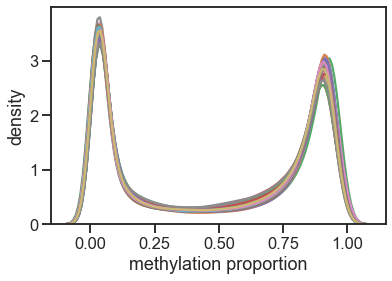

In [20]:
for sample in sample_list:
    sns.distplot(f_data[sample],hist=False)
plt.xlabel("methylation proportion")
plt.ylabel("density")
plt.show()

In [21]:
groupnf=[]
groupf=[]

for sample in sample_list:
    if sample in nonfamine_cleaned:
        groupnf.append(sample)
    elif sample in famine_cleaned:
        groupf.append(sample)

print(groupnf)
print(groupf)

samples_ct = [len(groupnf),len(groupf)]

['CHINFAM-02', 'CHINFAM-04', 'CHINFAM-06', 'CHINFAM-09', 'CHINFAM-13', 'CHINFAM-14', 'CHINFAM-17', 'CHINFAM-26', 'CHINFAM-27', 'CHINFAM-28', 'CHINFAM-31', 'CHINFAM-36', 'CHINFAM-37', 'CHINFAM-38', 'CHINFAM-39', 'CHINFAM-43', 'CHINFAM-47', 'CHINFAM-53', 'CHINFAM-54', 'CHINFAM-55', 'CHINFAM-58', 'CHINFAM-60', 'CHINFAM-65', 'CHINFAM-66', 'CHINFAM-72', 'CHINFAM-73', 'CHINFAM-77', 'CHINFAM-78', 'CHINFAM-79', 'CHINFAM-80', 'CHINFAM-84', 'CHINFAM-86', 'CHINFAM-90', 'CHINFAM-91', 'CHINFAM-94', 'CHINFAM-97', 'CHINFAM-98', 'CHINFAM-101', 'CHINFAM-103', 'CHINFAM-109', 'CHINFAM-113', 'CHINFAM-114', 'CHINFAM-117', 'CHINFAM-118', 'CHINFAM-122', 'CHINFAM-124', 'CHINFAM-126', 'CHINFAM-131', 'CHINFAM-135', 'CHINFAM-138', 'CHINFAM-140', 'CHINFAM-149', 'CHINFAM-150', 'CHINFAM-153']
['CHINFAM-11', 'CHINFAM-19', 'CHINFAM-22', 'CHINFAM-33', 'CHINFAM-45', 'CHINFAM-50', 'CHINFAM-51', 'CHINFAM-61', 'CHINFAM-62', 'CHINFAM-67', 'CHINFAM-68', 'CHINFAM-83', 'CHINFAM-88', 'CHINFAM-95', 'CHINFAM-105', 'CHINFAM-106',

In [22]:
betas_nf=f_data[groupnf]
betas_f=f_data[groupf]

In [23]:
averagesnf = []
averagesf = []

for sample in groupnf:
    averagesnf.append(f_data[sample].mean())
for sample in groupf:
    averagesf.append(f_data[sample].mean())

In [24]:
averagesnf_df=pd.DataFrame(averagesnf)
averagesnf_df["group"] = "unexposed"
averagesnf_df.head()

,0,group
0,0.494120,unexposed
1,0.497233,unexposed
2,0.495812,unexposed
3,0.500413,unexposed
4,0.498304,unexposed


In [25]:
averagesf_df=pd.DataFrame(averagesnf)
averagesf_df["group"] = "exposed"
averagesf_df.head()

,0,group
0,0.494120,exposed
1,0.497233,exposed
2,0.495812,exposed
3,0.500413,exposed
4,0.498304,exposed


In [26]:
all_samples_df = pd.concat([averagesnf_df, averagesf_df])
all_samples_df.columns = ["averages", "group"]
all_samples_df

,averages,group
0,0.494120,unexposed
1,0.497233,unexposed
2,0.495812,unexposed
3,0.500413,unexposed
4,0.498304,unexposed
...,...,...
49,0.499584,exposed
50,0.494109,exposed
51,0.493550,exposed
52,0.492076,exposed


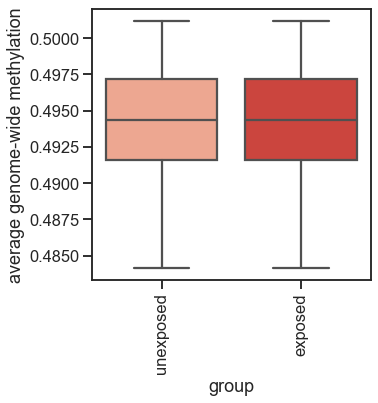

In [27]:
plt.figure(figsize=(5, 5))
sns.boxplot("group", "averages", data=all_samples_df, palette=sns.color_palette("Reds", 2))
plt.xticks(rotation=90)
plt.ylabel("average genome-wide methylation")
plt.show()

In [28]:
samples_df = pd.DataFrame(samples_ct)
samples_df["group"] = "unexposed","exposed"
samples_df.columns=["samples","group"]
samples_df

,samples,group
0,54,unexposed
1,25,exposed


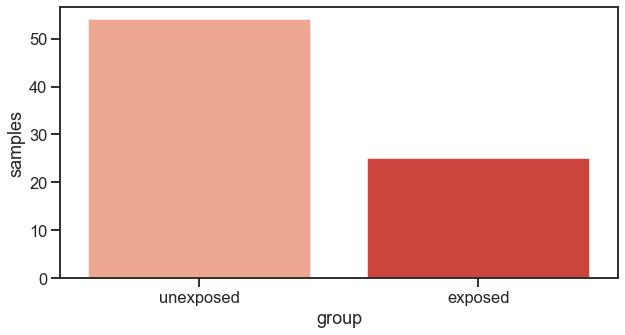

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x="group", y="samples", data=samples_df,palette="Reds")
plt.show()

In [30]:
ilum = pd.read_csv("~/Desktop/research/IluminaManifestShortened.csv")

/Users/zeel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [31]:
ilum_df = pd.DataFrame(ilum)
ilum_df = ilum_df.rename(columns={"IlmnID":"ID_Column"})
ilum_df

,ID_Column,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00035864,cg00035864,Y,8553009.0,TTTY18,TSS1500
1,cg00050873,cg00050873,Y,9363356.0,TSPY4;FAM197Y2,Body;TSS1500
2,cg00061679,cg00061679,Y,25314171.0,DAZ1;DAZ4;DAZ4,Body;Body;Body
3,cg00063477,cg00063477,Y,22741795.0,EIF1AY,Body
4,cg00121626,cg00121626,Y,21664296.0,BCORL2,Body
...,...,...,...,...,...,...
486423,65622344,NORM_T,NaN,NaN,NaN,NaN
486424,57640346,NORM_C,NaN,NaN,NaN,NaN
486425,47715450,NORM_T,NaN,NaN,NaN,NaN
486426,28673402,NORM_C,NaN,NaN,NaN,NaN


In [32]:
combined_df=pd.merge(f_data_df,ilum_df,on="ID_Column")
combined_df

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00000957,0.906338,0.907617,0.891621,0.905248,0.928827,0.908860,0.917947,0.906011,0.898094,...,0.904839,0.906641,0.902532,0.880079,0.875391,cg00000957,1,5937253.0,NPHP4,Body
1,cg00001349,0.795982,0.827995,0.812655,0.783726,0.874244,0.850599,0.782127,0.871882,0.782600,...,0.813668,0.735763,0.774871,0.666079,0.841334,cg00001349,1,166958439.0,MAEL,TSS200
2,cg00001583,0.064113,0.063894,0.148885,0.047437,0.053985,0.106758,0.042206,0.107500,0.118233,...,0.066468,0.094094,0.067498,0.140997,0.080977,cg00001583,1,200011786.0,NR5A2;NR5A2,Body;Body
3,cg00002028,0.038517,0.043007,0.038803,0.038917,0.029078,0.048767,0.033550,0.049705,0.063073,...,0.039748,0.043946,0.040510,0.041075,0.041628,cg00002028,1,20960010.0,PINK1;PINK1,1stExon;5'UTR
4,cg00002719,0.023932,0.020447,0.023664,0.022077,0.023871,0.026260,0.021117,0.024962,0.024138,...,0.019993,0.018731,0.028277,0.027842,0.025111,cg00002719,1,169396706.0,C1orf114,TSS200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427286,ch.22.43177094F,0.009295,0.009713,0.010528,0.009112,0.010589,0.010360,0.008978,0.010589,0.011685,...,0.013659,0.009015,0.011450,0.010029,0.008498,ch.22.43177094F,22,44798430.0,NaN,NaN
427287,ch.22.44116734F,0.031637,0.036071,0.041642,0.013808,0.034098,0.026291,0.027011,0.034374,0.026910,...,0.027592,0.025500,0.028814,0.022262,0.026872,ch.22.44116734F,22,45738070.0,NaN,NaN
427288,ch.22.909671F,0.048636,0.061760,0.066086,0.063347,0.061947,0.069387,0.048319,0.062899,0.061702,...,0.048295,0.045084,0.048292,0.043553,0.062073,ch.22.909671F,22,46114168.0,ATXN10;ATXN10,Body;Body
427289,ch.22.46830341F,0.017358,0.018219,0.017957,0.013567,0.015167,0.015734,0.016281,0.016374,0.015793,...,0.021754,0.012670,0.016012,0.017544,0.014541,ch.22.46830341F,22,48451677.0,NaN,NaN


In [33]:
combined_df_no_nan = combined_df.dropna()

sites in bangladesh paper

In [34]:
vtrna2_1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("VTRNA2-1")]
vtrna2_1

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group


In [35]:
pax8 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("PAX8")]
pax8

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
11940,cg01577475,0.053726,0.047089,0.081270,0.037651,0.050804,0.044523,0.048531,0.129101,0.044279,...,0.046668,0.058072,0.061251,0.154477,0.058709,cg01577475,2,114033581.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839,Body;Body;Body;Body;Body;Body
13492,cg06881093,0.397081,0.358108,0.466725,0.398760,0.322652,0.334243,0.301239,0.407939,0.453779,...,0.349862,0.301812,0.382132,0.389387,0.369317,cg06881093,2,114035983.0,PAX8;PAX8;PAX8;PAX8;LOC440839;PAX8,5'UTR;5'UTR;5'UTR;5'UTR;Body;5'UTR
13704,cg07594247,0.763288,0.759523,0.702983,0.598599,0.777722,0.482970,0.352130,0.354057,0.729614,...,0.702810,0.645644,0.590896,0.571016,0.616477,cg07594247,2,113993304.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
13751,cg07772999,0.801611,0.726990,0.715854,0.594221,0.757214,0.550975,0.453461,0.505300,0.793856,...,0.678527,0.647180,0.604738,0.615853,0.651732,cg07772999,2,113993052.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
14153,cg09234973,0.956269,0.926655,0.945849,0.937873,0.953838,0.935045,0.940406,0.952587,0.938569,...,0.927393,0.931020,0.930616,0.932267,0.941949,cg09234973,2,113975820.0,PAX8;PAX8;PAX8;PAX8;LOC440839;PAX8,3'UTR;3'UTR;3'UTR;3'UTR;Body;3'UTR
14910,cg11763394,0.971348,0.880581,0.818537,0.668558,0.893834,0.618829,0.556571,0.539381,0.971767,...,0.807786,0.773955,0.661627,0.670294,0.747169,cg11763394,2,113992921.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
15199,cg12889195,0.958006,0.866183,0.851412,0.675875,0.925023,0.631957,0.485747,0.518688,0.961660,...,0.836668,0.814136,0.678109,0.684550,0.748582,cg12889195,2,113992843.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
17784,cg21550016,0.972101,0.879507,0.828070,0.647539,0.900639,0.623177,0.488035,0.531658,0.966957,...,0.825950,0.792406,0.686888,0.688034,0.766074,cg21550016,2,113992930.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839;LOC654433,Body;Body;Body;Body;Body;Body;TSS1500
17805,cg21610815,0.928011,0.932612,0.922393,0.896414,0.922259,0.881537,0.815244,0.706289,0.915433,...,0.909231,0.877916,0.760227,0.830047,0.889317,cg21610815,2,113994035.0,PAX8;PAX8;LOC654433;PAX8;PAX8;PAX8;LOC440839,Body;Body;Body;Body;Body;Body;Body
18896,cg25243455,0.034945,0.037641,0.034111,0.033991,0.035345,0.038880,0.039913,0.075946,0.030273,...,0.028894,0.031017,0.029681,0.044789,0.031746,cg25243455,2,114033360.0,PAX8;PAX8;PAX8;PAX8;PAX8;LOC440839,Body;Body;Body;Body;Body;Body


In [36]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(pax8[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

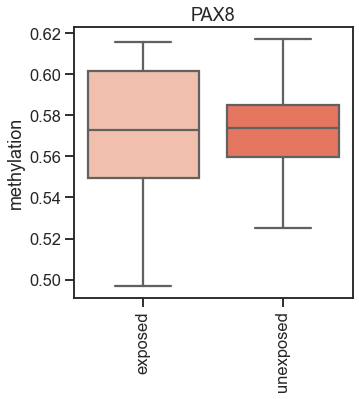

In [37]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PAX8")
plt.show()

In [38]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.622757
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.002262
Time:                        15:05:06   Log-Likelihood:                -49.198
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.6367
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8769      5.601     -0.335      0.738     -12.855       9.101
x1              4.6216    

In [39]:
prdm9 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("PRDM9")]
prdm9

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
30446,cg02444433,0.807382,0.777877,0.718079,0.692312,0.881524,0.765474,0.795072,0.943291,0.826407,...,0.967471,0.795916,0.887107,0.892751,0.860234,cg02444433,5,23507469.0,PRDM9,TSS1500
31262,cg07011961,0.728266,0.716723,0.613837,0.609436,0.870206,0.729676,0.672343,0.835509,0.752599,...,0.825643,0.614211,0.721293,0.643065,0.724811,cg07011961,5,23507594.0,PRDM9,TSS200
33958,cg19837938,0.684268,0.648318,0.590954,0.594162,0.743448,0.642371,0.622335,0.694521,0.638301,...,0.722007,0.603479,0.677927,0.636911,0.654658,cg19837938,5,23507458.0,PRDM9,TSS1500
34300,cg22054885,0.762004,0.751897,0.668975,0.646900,0.799291,0.787547,0.786743,0.886589,0.789509,...,0.876531,0.738282,0.815827,0.751590,0.797614,cg22054885,5,23507450.0,PRDM9,TSS1500
34989,cg25472530,0.619474,0.589798,0.488443,0.457763,0.707238,0.586404,0.603551,0.793921,0.652245,...,0.808111,0.618435,0.700734,0.720139,0.699047,cg25472530,5,23507617.0,PRDM9,TSS200
203830,cg01667892,0.751240,0.713331,0.607276,0.512765,0.800989,0.751713,0.704499,0.863832,0.726819,...,0.903078,0.753133,0.775099,0.798090,0.737551,cg01667892,5,23507656.0,PRDM9,TSS200
205571,cg04362002,0.637721,0.600113,0.541852,0.505477,0.666743,0.550059,0.592877,0.613980,0.604110,...,0.673427,0.618805,0.608701,0.594214,0.602190,cg04362002,5,23506738.0,PRDM9,TSS1500
209300,cg10589310,0.708107,0.589913,0.633349,0.552558,0.721891,0.681151,0.601622,0.761780,0.678293,...,0.757895,0.607036,0.633972,0.629057,0.663692,cg10589310,5,23507030.0,PRDM9,TSS1500
215890,cg22079902,0.792920,0.736522,0.683303,0.556299,0.777897,0.725250,0.739155,0.834575,0.768336,...,0.863016,0.771178,0.835835,0.800335,0.800200,cg22079902,5,23507644.0,PRDM9,TSS200


In [40]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(prdm9[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

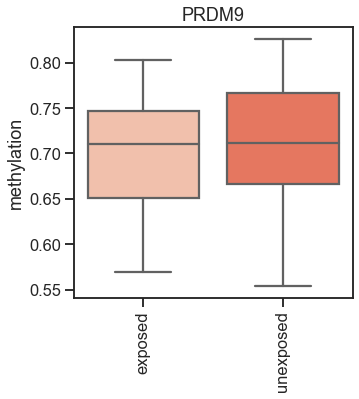

In [41]:
plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("PRDM9")
plt.show()

In [42]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.621848
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.003718
Time:                        15:05:07   Log-Likelihood:                -49.126
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.5448
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7072      2.445     -0.289      0.772      -5.500       4.086
x1              2.0995    

In [43]:
zfp57 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("ZFP57")]
zfp57

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
39217,cg12463578,0.516485,0.457157,0.282199,0.446022,0.711217,0.441241,0.443894,0.582718,0.430406,...,0.389750,0.604706,0.368524,0.669643,0.507404,cg12463578,6,29644756.0,ZFP57,1stExon
219745,cg00539542,0.883535,0.821150,0.800202,0.801825,0.903835,0.805646,0.823529,0.912712,0.866586,...,0.834882,0.861302,0.830336,0.871430,0.871436,cg00539542,6,29644544.0,ZFP57,Body
222155,cg02887726,0.941618,0.931382,0.938683,0.926502,0.928392,0.938439,0.938550,0.937004,0.952006,...,0.933670,0.950931,0.933571,0.935650,0.935842,cg02887726,6,29641082.0,ZFP57,Body
222505,cg03200120,0.925202,0.928511,0.917537,0.933275,0.904252,0.919683,0.912123,0.861204,0.915477,...,0.904587,0.898271,0.930403,0.888524,0.908947,cg03200120,6,29641443.0,ZFP57,Body
241541,cg25396488,0.924641,0.923980,0.904037,0.925551,0.904196,0.906328,0.900776,0.895421,0.893628,...,0.940961,0.907225,0.917777,0.888038,0.899336,cg25396488,6,29641118.0,ZFP57,Body


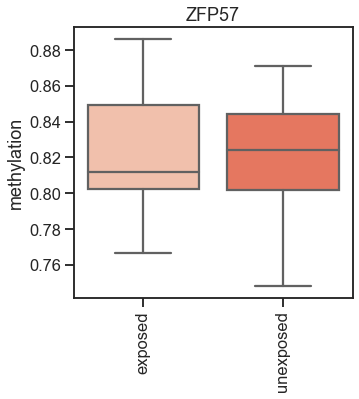

In [44]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(zfp57[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("ZFP57")
plt.show()

In [45]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.623439
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.001170
Time:                        15:05:07   Log-Likelihood:                -49.252
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.7341
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.9190      6.344      0.460      0.645      -9.516      15.354
x1             -2.6122    

In [46]:
bola = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("BOLA")]
bola 

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
7563,cg17906269,0.050571,0.040340,0.043118,0.035462,0.036395,0.027582,0.065134,0.046967,0.057519,...,0.063360,0.054844,0.067714,0.057930,0.053053,cg17906269,1,149871404.0,BOLA1,5'UTR
8416,cg20164915,0.077484,0.086380,0.098422,0.080268,0.071734,0.073549,0.067822,0.083328,0.094071,...,0.072126,0.077966,0.121371,0.108493,0.088260,cg20164915,1,149871167.0,BOLA1;BOLA1,1stExon;5'UTR
11426,cg27541317,0.245919,0.289288,0.169636,0.351515,0.291136,0.255720,0.197587,0.151961,0.315709,...,0.272631,0.265336,0.323132,0.249370,0.308360,cg27541317,1,149871625.0,BOLA1,Body
11713,cg00724035,0.025328,0.031502,0.027035,0.027375,0.021925,0.029166,0.025335,0.032593,0.028125,...,0.031845,0.028405,0.033751,0.031828,0.031168,cg00724035,2,74375213.0,BOLA3;BOLA3,TSS200;TSS200
12066,cg02051239,0.154027,0.091346,0.221205,0.080885,0.101940,0.175916,0.116046,0.244230,0.208973,...,0.156432,0.096663,0.123424,0.243634,0.179846,cg02051239,2,74375507.0,BOLA3;BOLA3,TSS1500;TSS1500
14111,cg09036127,0.017882,0.019961,0.020871,0.020239,0.017143,0.020300,0.020907,0.023742,0.022416,...,0.020564,0.021374,0.024588,0.025521,0.025365,cg09036127,2,74375193.0,BOLA3;BOLA3,TSS200;TSS200
14315,cg09717809,0.969505,0.963261,0.956092,0.964749,0.967116,0.967541,0.959905,0.959815,0.963264,...,0.968338,0.966214,0.963248,0.938044,0.962782,cg09717809,2,74375930.0,BOLA3;BOLA3,TSS1500;TSS1500
14648,cg10804730,0.035935,0.044865,0.046506,0.041660,0.029295,0.043793,0.039719,0.039256,0.054885,...,0.041973,0.057879,0.075254,0.047816,0.060454,cg10804730,2,74375143.0,BOLA3;BOLA3,TSS200;TSS200
16467,cg17053845,0.035265,0.035498,0.034519,0.044948,0.029124,0.040038,0.041365,0.037057,0.042027,...,0.040907,0.037968,0.044797,0.049376,0.049137,cg17053845,2,74375133.0,BOLA3;BOLA3,TSS200;TSS200
17502,cg20644426,0.043662,0.050047,0.045320,0.038386,0.039595,0.050595,0.060811,0.061460,0.069198,...,0.057830,0.046679,0.062513,0.091123,0.065230,cg20644426,2,74375147.0,BOLA3;BOLA3,TSS200;TSS200


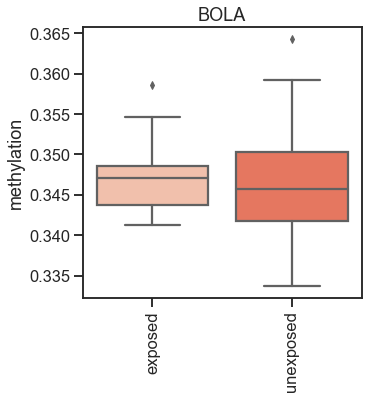

In [47]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(bola[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("BOLA")
plt.show()

In [48]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.622609
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.002499
Time:                        15:05:07   Log-Likelihood:                -49.186
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.6196
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.0783     14.727      0.549      0.583     -20.786      36.943
x1            -21.0811    

In [49]:
exp3 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("EXP3")]
exp3 #none found

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group


methylation @ specific sites

In [50]:
cdk1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("CDK1;")]
cdk1

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
57854,cg01394540,0.030700,0.035978,0.032846,0.026255,0.027682,0.029231,0.027241,0.037014,0.037127,...,0.030610,0.029647,0.037197,0.031726,0.036445,cg01394540,10,62537996.0,CDC2;CDK1;CDK1;CDK1;CDK1,TSS1500;TSS1500;TSS1500;TSS200;TSS1500
59077,cg06793798,0.069620,0.065598,0.074089,0.061367,0.068031,0.073586,0.049771,0.067021,0.074481,...,0.065320,0.071977,0.077777,0.085679,0.078719,cg06793798,10,62538126.0,CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,TSS200;TSS200;5'UTR;1stExon;TSS200;TSS200
60603,cg13554667,0.101662,0.104221,0.135246,0.094546,0.075129,0.093564,0.132008,0.124459,0.121332,...,0.127940,0.113138,0.104758,0.116585,0.130893,cg13554667,10,62538283.0,CDK1;CDK1;CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,5'UTR;5'UTR;1stExon;TSS200;1stExon;5'UTR;1stEx...
60687,cg13954297,0.013528,0.014980,0.014762,0.014080,0.014719,0.014588,0.014054,0.014575,0.013714,...,0.016645,0.015354,0.015897,0.014120,0.015046,cg13954297,10,62538113.0,CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,TSS200;TSS200;5'UTR;1stExon;TSS200;TSS200
60979,cg15172601,0.026288,0.024748,0.024666,0.022877,0.030986,0.024120,0.027179,0.027423,0.027052,...,0.026609,0.026409,0.027210,0.025041,0.024104,cg15172601,10,62538042.0,CDK1;CDC2;CDK1;CDK1;CDK1,TSS200;TSS1500;TSS200;TSS200;TSS200
61880,cg18827378,0.027037,0.037161,0.039609,0.025555,0.028243,0.030338,0.029810,0.033198,0.034225,...,0.025149,0.029008,0.034725,0.036161,0.038736,cg18827378,10,62538417.0,CDK1;CDC2;CDK1;CDC2;CDK1;CDK1,5'UTR;5'UTR;5'UTR;1stExon;5'UTR;5'UTR
62717,cg23973115,0.825340,0.801359,0.741715,0.817910,0.804144,0.830864,0.834249,0.725456,0.773834,...,0.874701,0.851850,0.849457,0.819647,0.775467,cg23973115,10,62540149.0,CDK1;CDK1;CDK1;CDC2;CDK1,Body;Body;Body;Body;Body
63002,cg25228510,0.163220,0.138707,0.153383,0.140677,0.123329,0.148750,0.149287,0.151292,0.158126,...,0.159128,0.159186,0.150962,0.146475,0.148217,cg25228510,10,62538235.0,CDK1;CDK1;CDK1;CDC2;CDK1;CDK1;CDK1;CDK1,5'UTR;5'UTR;1stExon;TSS200;1stExon;5'UTR;1stEx...
63134,cg25793692,0.076668,0.082946,0.076031,0.087857,0.065396,0.084835,0.075251,0.067010,0.086351,...,0.083726,0.080159,0.099299,0.095269,0.078942,cg25793692,10,62538781.0,CDK1;CDC2;CDK1;CDK1;CDK1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR
63559,cg27457323,0.022514,0.029944,0.024987,0.022736,0.025182,0.025931,0.020787,0.023847,0.025103,...,0.024730,0.022627,0.021722,0.021890,0.021328,cg27457323,10,62538048.0,CDK1;CDC2;CDK1;CDK1;CDK1,TSS200;TSS1500;TSS200;TSS200;TSS200


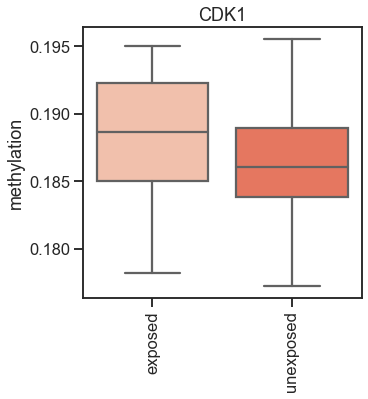

In [51]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(cdk1[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("CDK1")
plt.show()

In [52]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.607703
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                 0.02638
Time:                        15:05:08   Log-Likelihood:                -48.009
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.1068
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          18.4085     11.157      1.650      0.099      -3.460      40.277
x1            -94.0212    

In [53]:
hmga1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("HMGA1")]
hmga1

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
38537,cg10167849,0.013496,0.011439,0.014761,0.013728,0.011901,0.012275,0.014537,0.013493,0.015952,...,0.013194,0.013131,0.014275,0.014654,0.013483,cg10167849,6,34206152.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
38549,cg10200629,0.024242,0.030255,0.028774,0.031307,0.022972,0.027377,0.026560,0.041617,0.022336,...,0.037563,0.033792,0.026160,0.043543,0.024695,cg10200629,6,34205665.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500
39871,cg14590677,0.030930,0.034833,0.031197,0.027756,0.028050,0.030967,0.036801,0.035828,0.032851,...,0.033768,0.031341,0.026403,0.030391,0.031149,cg14590677,6,34204551.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS200;TSS200;TSS200;TSS200;TSS200
39920,cg14729855,0.076127,0.080342,0.095590,0.082547,0.076207,0.082006,0.084574,0.078224,0.076257,...,0.093918,0.093885,0.114287,0.088141,0.074335,cg14729855,6,34204698.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA...,5'UTR;5'UTR;5'UTR;5'UTR;1stExon;1stExon;1stExo...
41088,cg18696576,0.099384,0.115261,0.117225,0.090136,0.080608,0.123109,0.141606,0.103014,0.106132,...,0.125252,0.116284,0.141395,0.163745,0.100712,cg18696576,6,34203630.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
41506,cg20294304,0.064800,0.081949,0.102052,0.098304,0.070981,0.041105,0.051866,0.055609,0.069853,...,0.060834,0.140420,0.063043,0.089242,0.095823,cg20294304,6,34203153.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
41756,cg21234474,0.029896,0.030674,0.031992,0.036411,0.030333,0.034733,0.033124,0.037522,0.032059,...,0.032817,0.034900,0.038481,0.039180,0.038516,cg21234474,6,34204646.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS200;5'UTR;5'UTR;TSS200;1stExon;1stExon;1stE...
42205,cg22856287,0.020122,0.024367,0.022702,0.023976,0.020183,0.021955,0.021735,0.024396,0.020461,...,0.024765,0.021961,0.020186,0.022042,0.024539,cg22856287,6,34204459.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS200;TSS200;TSS200;TSS200;TSS200
219746,cg00544436,0.045131,0.032102,0.044120,0.028650,0.037306,0.029481,0.035066,0.040636,0.032520,...,0.028856,0.042723,0.036403,0.031603,0.027884,cg00544436,6,34203564.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,TSS1500;TSS1500;TSS1500;TSS1500;TSS1500
221001,cg01745499,0.054017,0.050315,0.047943,0.045066,0.057242,0.047809,0.044438,0.059415,0.039560,...,0.049067,0.040514,0.042607,0.048802,0.043844,cg01745499,6,34206084.0,HMGA1;HMGA1;HMGA1;HMGA1;HMGA1;HMGA1,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;TSS1500


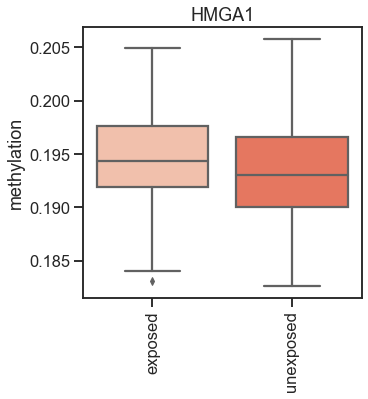

In [54]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(hmga1[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("HMGA1")
plt.show()

In [55]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.620940
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.005174
Time:                        15:05:08   Log-Likelihood:                -49.054
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.4750
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.0481      8.831      0.798      0.425     -10.260      24.356
x1            -32.3573    

In [56]:
dnajb6 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("DNAJB6")]
dnajb6

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
43810,cg00553120,0.013126,0.014870,0.012388,0.013337,0.013560,0.012819,0.015903,0.014314,0.013629,...,0.016703,0.014060,0.013094,0.015747,0.016462,cg00553120,7,157129669.0,DNAJB6;DNAJB6,TSS200;TSS200
44006,cg01410440,0.939717,0.943309,0.941080,0.942244,0.940443,0.929455,0.939352,0.940483,0.936137,...,0.939773,0.935625,0.927332,0.940722,0.932264,cg01410440,7,157193063.0,DNAJB6,Body
44815,cg04430780,0.902441,0.893610,0.897239,0.888118,0.901483,0.925509,0.901632,0.878953,0.904021,...,0.906518,0.888742,0.864835,0.905354,0.926479,cg04430780,7,157199439.0,DNAJB6,Body
45794,cg08011146,0.955862,0.954688,0.953209,0.946540,0.962036,0.945814,0.950154,0.954806,0.948531,...,0.963252,0.958033,0.926636,0.947118,0.942759,cg08011146,7,157195815.0,DNAJB6,Body
45947,cg08583888,0.919202,0.941052,0.916266,0.921393,0.905433,0.908487,0.933954,0.929852,0.934452,...,0.919110,0.917319,0.937280,0.926376,0.927729,cg08583888,7,157174475.0,DNAJB6;DNAJB6,Body;Body
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261467,cg26160086,0.833776,0.844555,0.843443,0.807496,0.831091,0.841933,0.831443,0.819444,0.841215,...,0.799544,0.821515,0.817270,0.809746,0.791324,cg26160086,7,157205545.0,DNAJB6,Body
261796,cg26668151,0.059453,0.056020,0.059507,0.046752,0.062885,0.047641,0.055173,0.071233,0.047666,...,0.050590,0.043954,0.041755,0.052958,0.057422,cg26668151,7,157180005.0,DNAJB6,Body
261901,cg26860459,0.945971,0.940328,0.942986,0.943467,0.940277,0.926674,0.940732,0.946250,0.948317,...,0.952591,0.943491,0.934488,0.931459,0.942389,cg26860459,7,157199417.0,DNAJB6,Body
262003,cg27023755,0.926125,0.927357,0.917009,0.929048,0.910525,0.917272,0.919339,0.912882,0.910772,...,0.935192,0.918724,0.912558,0.901927,0.917131,cg27023755,7,157200373.0,DNAJB6,Body


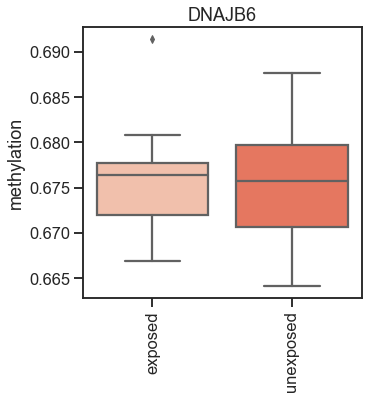

In [57]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(dnajb6[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("DNAJB6")
plt.show()

In [58]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.624122
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:               7.480e-05
Time:                        15:05:08   Log-Likelihood:                -49.306
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.9316
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.7868     29.778     -0.060      0.952     -60.150      56.576
x1              3.7855    

In [59]:
wfdc9 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("WFDC9")]
wfdc9

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
413546,cg02605634,0.183198,0.109571,0.166501,0.133922,0.126928,0.143998,0.127374,0.214162,0.181343,...,0.140081,0.130624,0.118463,0.154779,0.114117,cg02605634,20,44258384.0,WFDC10A;WFDC9;WFDC10A,5'UTR;5'UTR;1stExon
415784,cg11764966,0.039483,0.026280,0.076697,0.031892,0.030126,0.036580,0.032556,0.033975,0.041839,...,0.039080,0.027443,0.032814,0.045345,0.025356,cg11764966,20,44258197.0,WFDC10A;WFDC9,TSS200;5'UTR
415862,cg12061127,0.826640,0.854637,0.832003,0.906249,0.867089,0.825383,0.871271,0.810200,0.825242,...,0.866997,0.860333,0.885136,0.810844,0.858989,cg12061127,20,44259912.0,WFDC9,TSS200
416027,cg12740857,0.892850,0.890551,0.890710,0.913483,0.907097,0.886053,0.913065,0.868259,0.900663,...,0.910118,0.899876,0.908481,0.862069,0.902786,cg12740857,20,44237356.0,WFDC9,Body
416557,cg15107861,0.108954,0.050668,0.155451,0.073147,0.087694,0.096090,0.078519,0.194922,0.124940,...,0.096931,0.111473,0.055842,0.129071,0.076868,cg15107861,20,44258271.0,WFDC10A;WFDC9,TSS200;5'UTR
416664,cg15638170,0.901617,0.920244,0.906893,0.924822,0.926995,0.914119,0.945929,0.905999,0.929215,...,0.935209,0.935552,0.918294,0.902847,0.923601,cg15638170,20,44261252.0,WFDC9,TSS1500
416825,cg16496526,0.102719,0.046189,0.130644,0.057897,0.069791,0.072861,0.051703,0.171548,0.096680,...,0.071948,0.087588,0.047260,0.128577,0.061843,cg16496526,20,44258267.0,WFDC10A;WFDC9,TSS200;5'UTR
416973,cg17133224,0.923407,0.923053,0.910246,0.921598,0.910509,0.922498,0.914164,0.919833,0.921653,...,0.929833,0.919047,0.910218,0.911975,0.914145,cg17133224,20,44236736.0,WFDC9,3'UTR
417634,cg20169185,0.863174,0.881856,0.836489,0.869796,0.873905,0.858889,0.862413,0.839433,0.832348,...,0.878062,0.868132,0.842635,0.828578,0.845783,cg20169185,20,44261389.0,WFDC9,TSS1500
418543,cg24337225,0.889590,0.896592,0.880509,0.900872,0.921190,0.814094,0.904867,0.866136,0.897520,...,0.883338,0.909333,0.892482,0.856361,0.885825,cg24337225,20,44259589.0,WFDC10A;WFDC9,Body;5'UTR


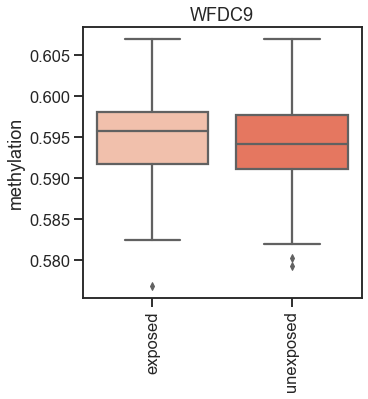

In [60]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(wfdc9[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("WFDC9")
plt.show()

In [61]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.623327
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.001349
Time:                        15:05:09   Log-Likelihood:                -49.243
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.7154
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.4926     24.017      0.395      0.693     -37.580      56.566
x1            -14.6765    

In [62]:
oxct1 = combined_df_no_nan[combined_df_no_nan["Gene_Name"].str.contains("OXCT1")]
oxct1

,ID_Column,CHINFAM-11,CHINFAM-19,CHINFAM-22,CHINFAM-33,CHINFAM-45,CHINFAM-50,CHINFAM-51,CHINFAM-61,CHINFAM-62,...,CHINFAM-138,CHINFAM-140,CHINFAM-149,CHINFAM-150,CHINFAM-153,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
30127,cg01060059,0.027776,0.039367,0.023979,0.018743,0.026232,0.320324,0.022378,0.025840,0.046098,...,0.172004,0.023939,0.033381,0.021016,0.026317,cg01060059,5,41870081.0,OXCT1,Body
33841,cg19435381,0.023671,0.029468,0.042636,0.023210,0.026819,0.055897,0.020445,0.025715,0.031716,...,0.020821,0.017438,0.030846,0.026452,0.027261,cg19435381,5,41870796.0,OXCT1,TSS200
34011,cg20405584,0.029188,0.024990,0.025106,0.019221,0.021560,0.068490,0.023243,0.027051,0.031878,...,0.034001,0.023779,0.023462,0.022360,0.029741,cg20405584,5,41870875.0,OXCT1,TSS200
203509,cg01186871,0.927057,0.922641,0.915337,0.938252,0.927814,0.923026,0.936325,0.923276,0.924519,...,0.937365,0.944411,0.921146,0.928162,0.923796,cg01186871,5,41868227.0,OXCT1,Body
204433,cg02389942,0.316013,0.260013,0.290784,0.220733,0.227376,0.349727,0.321015,0.290496,0.330851,...,0.443980,0.344424,0.286962,0.236569,0.254088,cg02389942,5,41869679.0,OXCT1,Body
204472,cg02441090,0.729872,0.722013,0.664556,0.718414,0.775066,0.728515,0.745493,0.672752,0.751557,...,0.698565,0.734836,0.752487,0.699938,0.676051,cg02441090,5,41871058.0,OXCT1,TSS1500
205052,cg03604312,0.923708,0.910596,0.920202,0.927098,0.918279,0.909418,0.910692,0.914136,0.913950,...,0.926218,0.921461,0.907797,0.918915,0.919974,cg03604312,5,41730687.0,OXCT1,3'UTR
205952,cg04981722,0.042336,0.031648,0.038763,0.041594,0.036857,0.064486,0.034108,0.034879,0.041933,...,0.046800,0.036292,0.040168,0.039036,0.035865,cg04981722,5,41870862.0,OXCT1,TSS200
206829,cg06537708,0.884357,0.894754,0.849906,0.849932,0.892840,0.870391,0.863712,0.863438,0.871647,...,0.857832,0.882970,0.846052,0.803331,0.852504,cg06537708,5,41871170.0,OXCT1,TSS1500
208241,cg08590939,0.087072,0.094160,0.103788,0.073417,0.085394,0.251148,0.117426,0.086101,0.149526,...,0.282332,0.116395,0.093406,0.060226,0.072321,cg08590939,5,41869963.0,OXCT1,Body


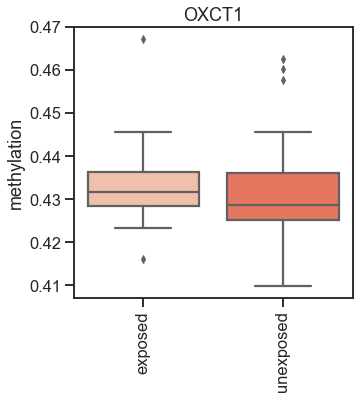

In [63]:
means = []
group_ids = []

for sample in list(sample_list):
    means.append(oxct1[sample].mean())
    if sample in nonfamine_cleaned:
        group_ids.append("unexposed")
    elif sample in famine_cleaned:
        group_ids.append("exposed")

plt.figure(figsize=(5, 5))
sns.boxplot(group_ids, means, palette=sns.color_palette("Reds", 3))
plt.xticks(rotation=90)
plt.ylabel("methylation")
plt.title("OXCT1")
plt.show()

In [64]:
combined = pd.DataFrame(np.array([means, group_ids]).T)
combined.columns = ["means", "group"]
X = combined["means"].values
Y = combined["group"].values
x2 = sm.add_constant(X.astype(float))
est = sm.MNLogit(Y, x2)
est2 = est.fit()
print(est2.summary())

Optimization terminated successfully.
         Current function value: 0.618090
         Iterations 5
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       77
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Jul 2021   Pseudo R-squ.:                0.009739
Time:                        15:05:09   Log-Likelihood:                -48.829
converged:                       True   LL-Null:                       -49.309
Covariance Type:            nonrobust   LLR p-value:                    0.3271
y=unexposed       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.0219     10.472      1.053      0.293      -9.502      31.546
x1            -23.7279    

Differential Analysis

In [65]:
c_data = pd.read_csv("c_gene_names.pval.txt",delimiter="\t")

In [66]:
c_data = c_data[["pval", "Unnamed: 0"]]
c_data

,pval,Unnamed: 0
0,0.824234,cg00000957
1,0.999071,cg00001349
2,0.345567,cg00001583
3,0.223677,cg00002028
4,0.275279,cg00002719
...,...,...
427286,0.956838,ch.22.43177094F
427287,0.336322,ch.22.44116734F
427288,0.553908,ch.22.909671F
427289,0.943232,ch.22.46830341F


In [67]:
sorted_c_data = c_data.sort_values(by="pval")
sorted_c_data.columns = ['pval', 'ID_Column']
sorted_c_data

,pval,ID_Column
33056,0.000002,cg15881107
10343,0.000003,cg24695281
51236,0.000025,cg01620486
241904,0.000034,cg25845867
382210,0.000052,cg08580254
...,...,...
257109,0.999986,cg19271753
43583,0.999989,cg27414863
169610,0.999995,cg24937269
150370,0.999995,cg01737698


In [68]:
ilum = pd.read_csv("~/Desktop/research/IluminaManifestShortened.csv")
ilum

/Users/zeel/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,IlmnID,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00035864,cg00035864,Y,8553009.0,TTTY18,TSS1500
1,cg00050873,cg00050873,Y,9363356.0,TSPY4;FAM197Y2,Body;TSS1500
2,cg00061679,cg00061679,Y,25314171.0,DAZ1;DAZ4;DAZ4,Body;Body;Body
3,cg00063477,cg00063477,Y,22741795.0,EIF1AY,Body
4,cg00121626,cg00121626,Y,21664296.0,BCORL2,Body
...,...,...,...,...,...,...
486423,65622344,NORM_T,NaN,NaN,NaN,NaN
486424,57640346,NORM_C,NaN,NaN,NaN,NaN
486425,47715450,NORM_T,NaN,NaN,NaN,NaN
486426,28673402,NORM_C,NaN,NaN,NaN,NaN


In [69]:
ilum_df = pd.DataFrame(ilum)
ilum_df = ilum_df.rename(columns={"IlmnID":"ID_Column"})
ilum_df

,ID_Column,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,cg00035864,cg00035864,Y,8553009.0,TTTY18,TSS1500
1,cg00050873,cg00050873,Y,9363356.0,TSPY4;FAM197Y2,Body;TSS1500
2,cg00061679,cg00061679,Y,25314171.0,DAZ1;DAZ4;DAZ4,Body;Body;Body
3,cg00063477,cg00063477,Y,22741795.0,EIF1AY,Body
4,cg00121626,cg00121626,Y,21664296.0,BCORL2,Body
...,...,...,...,...,...,...
486423,65622344,NORM_T,NaN,NaN,NaN,NaN
486424,57640346,NORM_C,NaN,NaN,NaN,NaN
486425,47715450,NORM_T,NaN,NaN,NaN,NaN
486426,28673402,NORM_C,NaN,NaN,NaN,NaN


In [70]:
combined_c_df=pd.merge(sorted_c_data,ilum_df,on="ID_Column")
combined_c_df

,pval,ID_Column,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
0,0.000002,cg15881107,cg15881107,5,13579577.0,NaN,NaN
1,0.000003,cg24695281,cg24695281,1,43760803.0,NaN,NaN
2,0.000025,cg01620486,cg01620486,8,47015640.0,NaN,NaN
3,0.000034,cg25845867,cg25845867,6,169575647.0,NaN,NaN
4,0.000052,cg08580254,cg08580254,17,38478807.0,RARA;RARA;RARA,5'UTR;5'UTR;5'UTR
...,...,...,...,...,...,...,...
427286,0.999986,cg19271753,cg19271753,7,5396704.0,TNRC18,Body
427287,0.999989,cg27414863,cg27414863,6,4953865.0,CDYL;CDYL;CDYL;CDYL,Body;Body;Body;Body
427288,0.999995,cg24937269,cg24937269,2,101179488.0,PDCL3;PDCL3,5'UTR;1stExon
427289,0.999995,cg01737698,cg01737698,2,176033199.0,ATF2;MIR933,TSS1500;TSS1500


In [71]:
combined_c_df[combined_c_df["pval"]<.005].dropna()[11:21]


,pval,ID_Column,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
21,0.000141,cg17890520,cg17890520,19,41945660.0,ATP5SL;ATP5SL;ATP5SL;ATP5SL;ATP5SL;ATP5SL;ATP5SL,Body;Body;TSS200;Body;Body;TSS200;Body
23,0.000156,cg13378643,cg13378643,7,4147432.0,SDK1,Body
24,0.000165,cg13645811,cg13645811,6,158403520.0,SYNJ2,Body
25,0.000177,cg16349148,cg16349148,5,6374845.0,MED10,Body
26,0.000182,cg13938349,cg13938349,7,44364084.0,CAMK2B;CAMK2B;CAMK2B;CAMK2B;CAMK2B;CAMK2B;CAMK...,Body;Body;Body;Body;Body;Body;Body;Body
27,0.000186,cg24525952,cg24525952,7,2127830.0,MAD1L1;MAD1L1;MAD1L1,Body;Body;Body
29,0.000192,cg05343184,cg05343184,1,3058151.0,PRDM16;PRDM16,Body;Body
30,0.000193,cg26816636,cg26816636,5,179495386.0,RNF130,Body
31,0.000194,cg15883603,cg15883603,4,186622408.0,SORBS2;SORBS2;SORBS2;SORBS2;SORBS2;SORBS2,5'UTR;5'UTR;5'UTR;5'UTR;5'UTR;5'UTR
32,0.000195,cg23970089,cg23970089,4,667564.0,ATP5I,Body


In [72]:
c_gene_names = []

for i in combined_c_df[combined_c_df["pval"] < 0.005].dropna()["Gene_Name"]:
    print(i.split(";")[0])
    c_gene_names.append(i.split(";")[0])
len(c_gene_names)

RARA
PRDX5
ONECUT3
SKI
SLC6A3
UCHL3
GUF1
LOC407835
KCNK13
NTN4
PC
ATP5SL
SDK1
SYNJ2
MED10
CAMK2B
MAD1L1
PRDM16
RNF130
SORBS2
ATP5I
VARS
POLG
CACNG1
KCNQ1OT1
ADARB2
F5
C1QL3
CPA2
ACOX3
SORBS2
RSPH9
DAB1
P2RY2
ABLIM2
VSX2
ASB6
SERINC3
MAD1L1
YWHAZ
KLF15
SMOC2
SYNM
TMTC2
BSPH1
STK32C
GDPD5
LOC149134
RBPMS
MAP4K4
DACT1
HHIPL1
ZMPSTE24
ZNF514
PPAN-P2RY11
CDK13
PFN2
HERPUD2
PRICKLE2
KLF9
CFB
CLK4
PLEKHA5
MAD1L1
MAD1L1
FLJ42709
ANXA9
ZFHX4
S1PR1
NIPAL1
VPS52
LOC728276
TBC1D14
LMTK3
PLEKHG5
HAMP
SMC5
PRKCA
LSM2
LOC284379
IGHMBP2
PRKCZ
INSM2
NXN
POU6F2
FAM98C
AKR7A3
ZNHIT1
VWF
SLC6A15
TMEM63C
ELFN1
CPN2
TAF2
ADCY9
FAM108A1
SGPP2
TSC1
RPL28
FAM102A
DDX27
PECR
HIST2H2AA4
GJA8
ATAD3A
ERICH1
C1orf95
ANK1
LHX2
TECTA
POL3S
SERPINA5
C4orf31
LMX1B
DHRS4L1
BMP7
EDN3
NRAP
SLC26A10
CLEC4E
MFSD2B
GPR157
ZNF578
TBKBP1
EGFR
TERT
SOBP
RNPC3
ETF1
MAD1L1
PDK4
FGF23
PDHA2
KLF7
VAMP8
CHRNB4
GABBR2
MGAT4C
MAGI1
ALDH1A2
PANK4
TNFSF12
SLC6A13
MYO9B
LMF1
RPRD2
SAMD4A
RAB1B
PCDHAC2
ZBTB43
C4orf31
ABCC1
C10orf35
NEU1
N

1010

In [73]:
c_gene_names[:10]

['RARA',
 'PRDX5',
 'ONECUT3',
 'SKI',
 'SLC6A3',
 'UCHL3',
 'GUF1',
 'LOC407835',
 'KCNK13',
 'NTN4']

In [74]:
b_gene_names = pd.read_csv("bangl_gene_names.txt",header=None)
b_gene_names

,0
0,TRIM59
1,ADARB2
2,TOR1AIP2
3,VAX2
4,OPN3
...,...
1049,RIN3
1050,C10orf27
1051,FAM65B
1052,CNNM2


In [75]:
c_len = len(c_gene_names)
b_len = len(b_gene_names)
print(c_len,b_len)

1010 1054


In [76]:
set_names = set(c_gene_names).intersection(set(b_gene_names))
set_names

set()

In [77]:
combined_c_df[combined_c_df['Gene_Name'] == 'TRIM59']

,pval,ID_Column,Name,CHR,MAPINFO,Gene_Name,UCSC_RefGene_Group
36471,0.075901,cg01459132,cg01459132,3,160167317.0,TRIM59,5'UTR
53850,0.107778,cg22064048,cg22064048,3,160168922.0,TRIM59,TSS1500
72915,0.142626,cg02723904,cg02723904,3,160167768.0,TRIM59,TSS200
114903,0.222835,cg26433838,cg26433838,3,160167749.0,TRIM59,TSS200
152193,0.298931,cg04008429,cg04008429,3,160167646.0,TRIM59,TSS200
178503,0.356768,cg11614451,cg11614451,3,160167729.0,TRIM59,TSS200
184992,0.371312,cg25113081,cg25113081,3,160156820.0,TRIM59,Body
187802,0.377631,cg26856080,cg26856080,3,160167746.0,TRIM59,TSS200
196162,0.396665,cg10273210,cg10273210,3,160167665.0,TRIM59,TSS200
201374,0.408547,cg15618978,cg15618978,3,160167990.0,TRIM59,TSS1500
